In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2023-10-17 17:09:17.124258: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:09:17.409846: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 17:09:17.409903: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 17:09:17.412134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 17:09:17.563717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:09:17.564977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [3]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10


2023-10-17 17:09:22.222711: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


937/938 [============================>.] - ETA: 0s - loss: 0.4940 - accuracy: 0.8209

2023-10-17 17:09:46.218800: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


938/938 [==============================] - 25s 26ms/step - loss: 0.4939 - accuracy: 0.8209 - val_loss: 0.3810 - val_accuracy: 0.8639
Epoch 2/10
938/938 [==============================] - 22s 24ms/step - loss: 0.3311 - accuracy: 0.8798 - val_loss: 0.3239 - val_accuracy: 0.8854
Epoch 3/10
938/938 [==============================] - 27s 29ms/step - loss: 0.2833 - accuracy: 0.8971 - val_loss: 0.2824 - val_accuracy: 0.8969
Epoch 4/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2541 - accuracy: 0.9059 - val_loss: 0.2877 - val_accuracy: 0.8935
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2258 - accuracy: 0.9166 - val_loss: 0.2924 - val_accuracy: 0.8870
Epoch 6/10
938/938 [==============================] - 34s 37ms/step - loss: 0.2058 - accuracy: 0.9231 - val_loss: 0.2592 - val_accuracy: 0.9074
Epoch 7/10
938/938 [==============================] - 32s 35ms/step - loss: 0.1868 - accuracy: 0.9299 - val_loss: 0.2521 - val_accuracy: 0.9085
Epo

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точність на тестових даних: {test_acc}')

 16/313 [>.............................] - ETA: 2s - loss: 0.2701 - accuracy: 0.9180

2023-10-17 17:14:44.996201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 7ms/step - loss: 0.2528 - accuracy: 0.9137
Точність на тестових даних: 0.9136999845504761


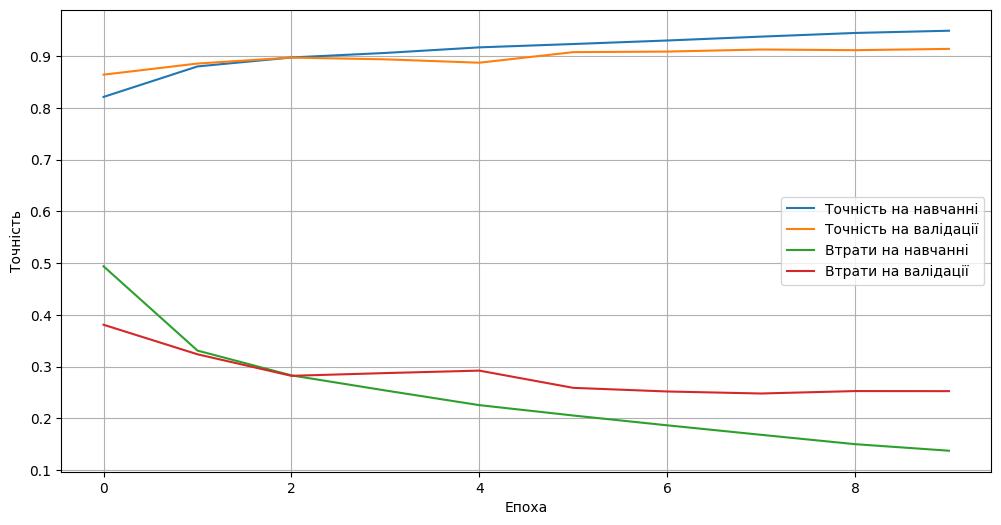

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Точність на навчанні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.plot(history.history['loss'], label='Втрати на навчанні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.grid(True)
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='right')
plt.show()

In [7]:
import random
num_samples = 10
random_indices = [random.randint(0, len(x_test) - 1) for _ in range(num_samples)]
sample_images = [x_test[i] for i in random_indices]
sample_labels = [y_test[i] for i in random_indices]

predictions = model.predict(np.array(sample_images))

class_names = ["Футболка", "Штаны", "Світшот", "Сукня", "Пальто", "Босоніжки", "Сорочка", "Кросівки", "Сумка", "ботильйони"]
predicted_labels = [class_names[np.argmax(prediction)] for prediction in predictions]

1/1 [==============================] - 0s 88ms/step


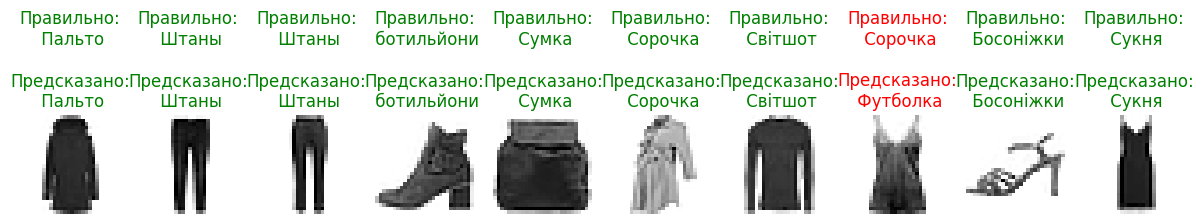

In [8]:
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap=plt.cm.binary)
    plt.title(f'Правильно:\n {class_names[sample_labels[i]]}\n\nПредсказано:\n {predicted_labels[i]}', color=('green' if predicted_labels[i] == class_names[sample_labels[i]] else 'red'))
    plt.axis('off')
plt.show()

In [9]:
#Висновок:CNN показала собою кращі результати у класифікації зображень одягу порівняно з багатошаровою мережею.
#Основним фактором, який може покращити точність моделі CNN, є управління перенавчанням, наприклад, використання регуляризації моделі або збільшення кількості даних для навчання.
#Модель CNN здатна робити класифікацію зображень одягу на дуже високому рівні точності, що робить її відмінним вибором для подібних завдань.